In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 12,5

In [33]:
df = pd.read_csv('EDA_Practice_Dataset_1_Bestseller_with_Categoriestopic_added1621240676s_p2076906743.csv')

In [34]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [82]:
df = df.drop_duplicates(keep='first', ignore_index=True)

In [83]:
df.shape

(550, 7)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [86]:
df.isna().any()

Name           False
Author         False
User Rating    False
Reviews        False
Price          False
Year           False
Genre          False
dtype: bool

In [87]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [88]:
df.skew(numeric_only=True)

User Rating   -1.502125
Reviews        2.421597
Price          3.685057
Year           0.000000
dtype: float64

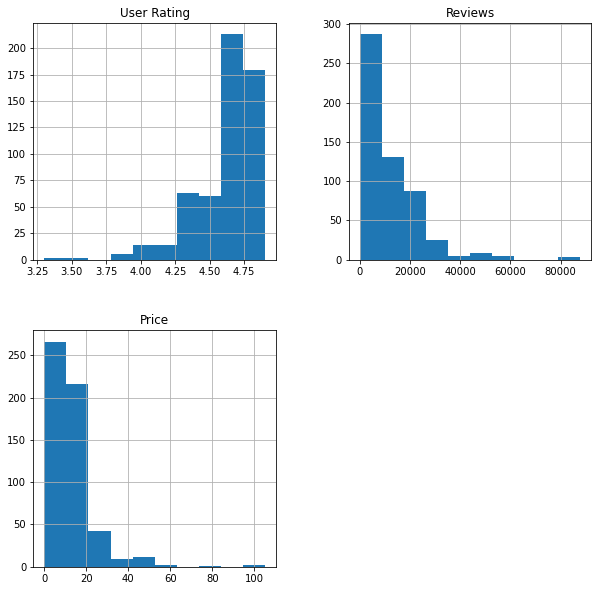

In [89]:
df[['User Rating', 'Reviews', 'Price']].hist(figsize=(10,10))
plt.show()

1) most of the user rating lies between 4.3 to 4.8 mean value is 4.6 and highest is 4.9 and lowest is 3.3 and data is skewed left side

2) most of the review is between 0 to 20000 data is skewed right side

3) highest price is 105 and lowest is 0 most of data is right skewed

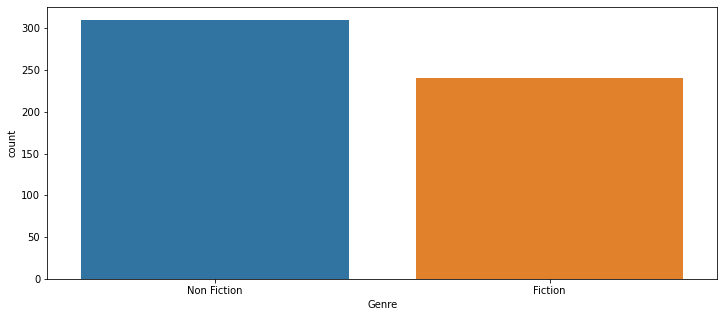

In [90]:
sns.countplot(x= 'Genre', data=df);

In [120]:
df.Genre.value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

Non Fiction are more

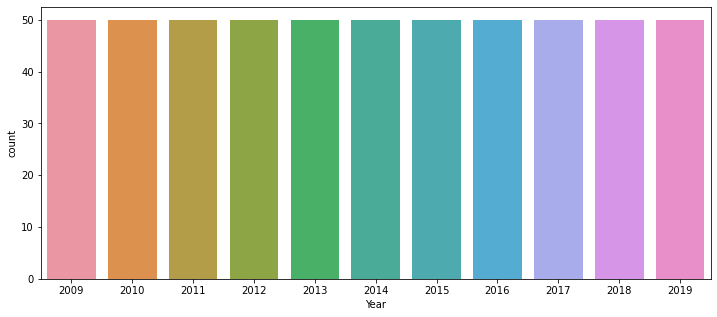

In [117]:
sns.countplot(x= 'Year', data=df);

In [118]:
df.Year.value_counts()

2016    50
2011    50
2018    50
2017    50
2019    50
2014    50
2010    50
2009    50
2015    50
2013    50
2012    50
Name: Year, dtype: int64

Here is one interesting result. It seem every year 50 novels are released

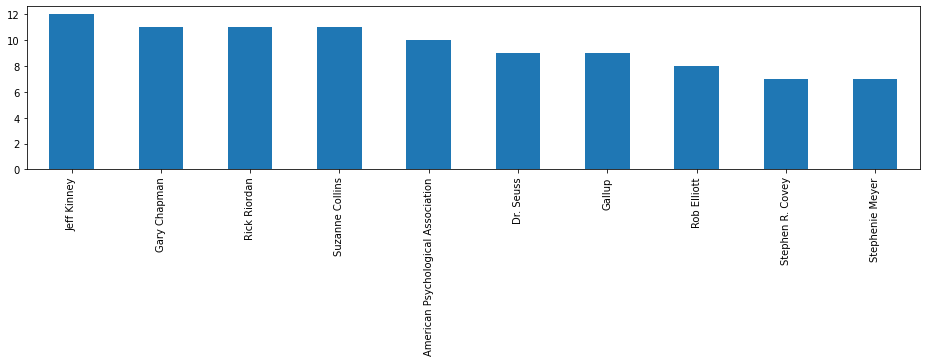

In [91]:
df.Author.value_counts().nlargest(10).plot(kind='bar', figsize=(16,3))
plt.show()

Jeff Kinnery has written most of novel

### Highest rated Novel

In [92]:
df[df['User Rating']==df['User Rating'].max()].head(3)

,Name,Author,User Rating,Reviews,Price,Year,Genre
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction


Here  both row 40 an 41 seems same after finding out the novel was publised on 1967 not in 2017 or 2019.

### Highest Price Novel

In [93]:
df[df['Price']==df['Price'].max()].head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction


Here both Entry are again have same name the right one is one with year 2013

### Year vs Price

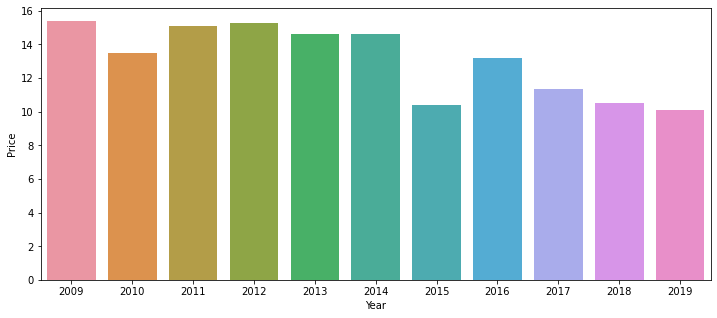

In [49]:
sns.barplot(x='Year', y = 'Price', data=df ,ci=None);

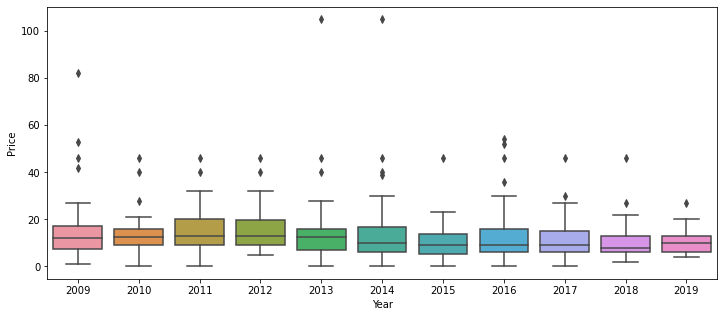

In [106]:
sns.boxplot(x='Year', y = 'Price', data=df );

### Price vs Genre

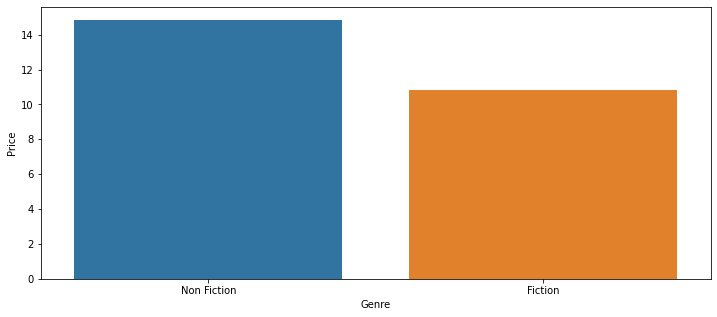

In [52]:
sns.barplot(x= 'Genre', y='Price', data = df, ci=None);

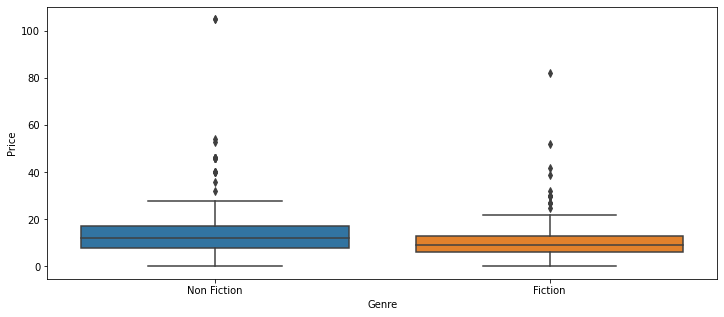

In [105]:
sns.boxplot(x= 'Genre', y='Price', data = df);

Price of non fiction movies are higher than the fiction ones.

### User Rating vs Genre

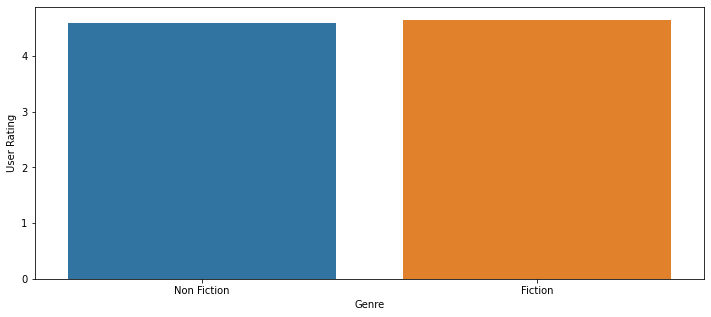

In [58]:
sns.barplot(x='Genre', y='User Rating', data=df, ci=None);

User rating wise both genre are same so people who prefer fiction and non fiction are almost equal

### User Rating vs Price

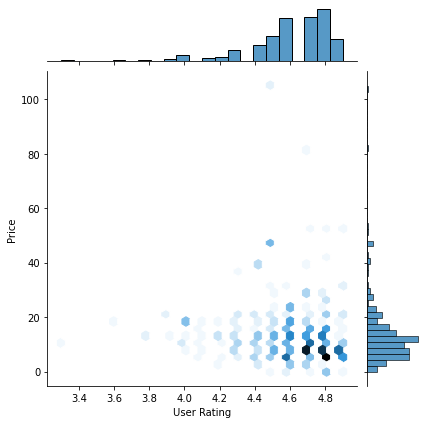

In [100]:
sns.jointplot(x='User Rating', y='Price', data=df, kind='hex');

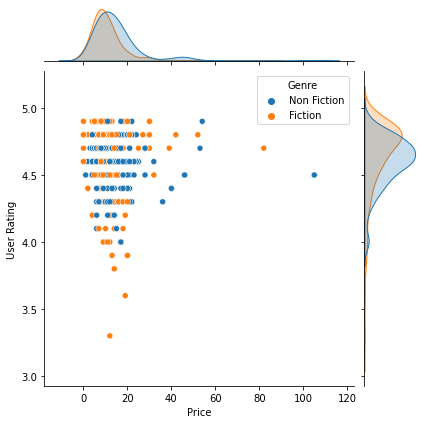

In [114]:
sns.jointplot(y='User Rating', x='Price', data=df,hue='Genre');

here we can see that most the movie with higher ratings are priced between 0 to 30

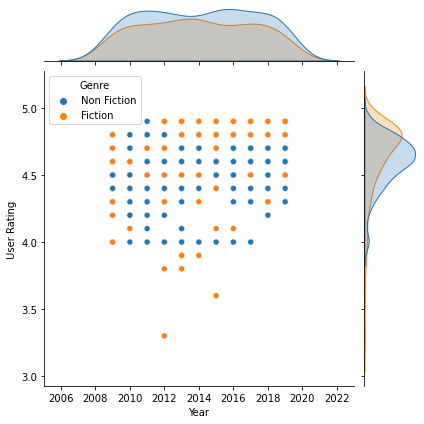

In [109]:
sns.jointplot(y='User Rating', x='Year', data=df,hue='Genre');

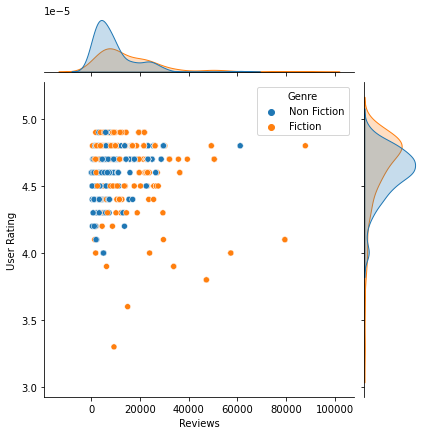

In [116]:
sns.jointplot(y='User Rating', x='Reviews', data=df,hue='Genre');

there are few fictional novel with both reviews and ratings higher

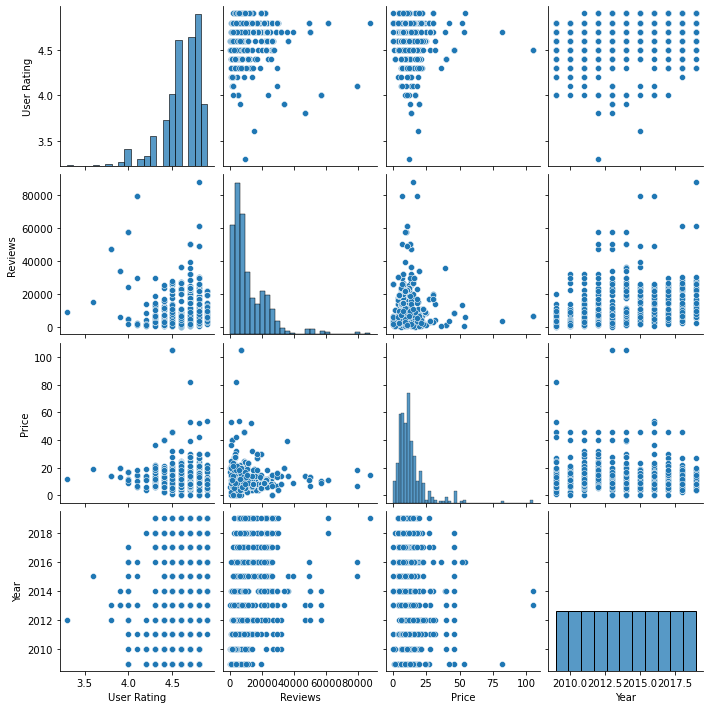

In [121]:
sns.pairplot(df);

<AxesSubplot:xlabel='User Rating,Genre'>

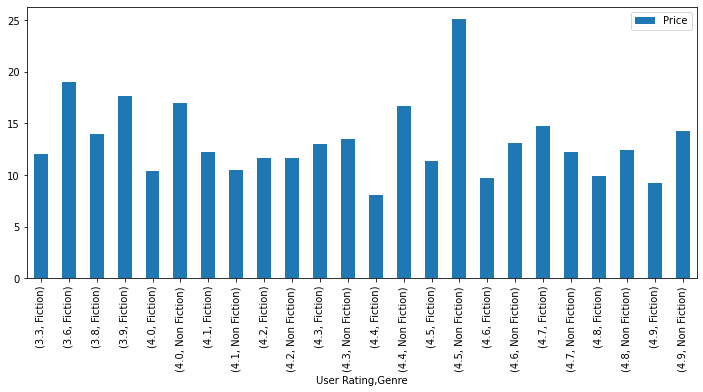

In [129]:
pd.pivot_table(df,index=['User Rating','Genre'], values='Price').plot(kind='bar')

Highest price is of movie with ratings 4.5 and genre of non fiction

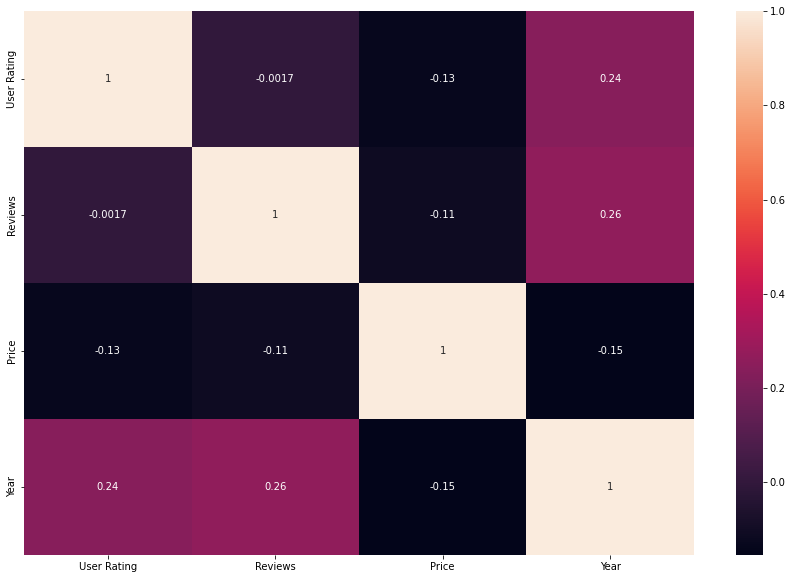

In [130]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

Here all attributes show weak colinearity amongs each other